### import data

In [872]:
# import needed packages
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

# download fonts https://www.fontsquirrel.com/fonts/open-sans
# font = {
#         'sans-serif' : 'Open Sans', 
#         'family' : 'sans-serif',
#         'weight' : 'normal',
#         'size'   : 12}
# plt.rc('font', **font)


# # load data from github
# data_url = 'https://raw.githubusercontent.com/ebauch/NV_data/master/T2star_survey.csv'
# data = urllib.request.urlopen(data_url)
# pd.read_csv(data, encoding='latin1', header=0)
# df

# if data is saved locally as csv uncomment lines below
file = 'T2star_survey.csv'
df = pd.read_csv(file, encoding='latin1', header=0)
df

,Defect,Host,Concentration (cm^-3),Interrogated Spins,Bath Concentration (cm^-3),T2* (us),T2 (us),FOM1 (us),FOM2 (us),Bath,Reference,Cryogenic,Measurement,Comment,Where to Find
0,NV-,Diamond,2.5E+12,2.5E+04,8.800000e+15,68,NaN,1.70E+14,1.70E+06,"0.05 ppm N, 0.01% 13C",Bauch2017,no,optical,"Thor, double quantum",table supplement
1,NV-,Diamond,1E+15,1.0E+07,1.300000e+17,58,NaN,5.80E+16,5.80E+08,"0.75 ppm N, 0.01% 13C",Bauch2017,no,optical,"Leo, double quantum + spin bath driving",table supplement
2,NV-,Diamond,1E+16,1.0E+07,1.800000e+18,5,NaN,5.00E+16,5.00E+07,"10 ppm N, 0.05% 13C",Bauch2017,no,optical,"Jamie, double quantum + spin bath driving",table supplement
3,NV-,Diamond,2.992E+17,n/a,4.800000e+18,0.5,NaN,1.50E+17,n/a,"1.7 ppm NV, 27 ppm N, 0.01% 13C",Barry2016,no,optical,NaN,NaN
4,NV-,Diamond,7.0E+16,1.0E+10,1.100000e+17,2.4,NaN,1.72E+17,2.45E+10,"0.4 ppm NV, 0.6 ppm N, 0.03% 13C",Grezes2015,no,optical,NaN,"4th paragraph, page 3 last paragraph"
5,NV-,Diamond,5.00E+10,1.0E+00,7.000000e+15,18.5,NaN,9.25E+11,1.85E+01,0.01% 13C,Ishikawa2012,no,optical,NaN,"2nd page 1st pargraph, fig. 3d, suppl."
6,NV-,Diamond,n/a,1.0E+11,NaN,0.2,NaN,n/a,2.00E+10,n/a,Kubo2011,no,optical,NaN,"last page, bottom left"
7,NV-,Diamond,7E+17,5.3E+11,1.800000e+19,0.15,NaN,1.05E+17,7.88E+10,"< 100 ppm N, 1.1 13C%",Acosta2010,no,optical,NaN,3rd paragraph
8,NV-,Diamond,2.8E+18,2.2E+08,1.800000e+19,0.1,NaN,2.80E+17,2.18E+07,"< 100 ppm N, 1.1 13C%",Acosta2009,no,optical,NaN,abstract
9,NV-,Diamond,7.92E+18,1.0E+05,9.680000e+18,0.055,NaN,4.36E+17,5.50E+03,"55 ppm N, 45 ppm NV, 1.1% 13C",Kucsko2017,no,optical,NaN,"supplement 1.1, 2"


In [873]:
# spin density
x1 = pd.to_numeric(df.iloc[:,2], 'coerce').get_values()
# number of interrogated spins
x2 = pd.to_numeric(df.iloc[:,3], 'coerce').get_values()
# T2* in us
x3 = pd.to_numeric(df.iloc[:,4], 'coerce').get_values()
# T2* in us
y1 = pd.to_numeric(df.iloc[:,5], 'coerce').get_values()
# FOM1 = T2* x spin density
y2 = pd.to_numeric(df.iloc[:,7], 'coerce').get_values()
# FOM2 = T2* x spin density
y3 = pd.to_numeric(df.iloc[:,8], 'coerce').get_values()

# reference + remove spaces
labels = df.iloc[:,10]
labels = [label.replace(" ","") for label in labels]

# NV Comparison Plots

### T2* versus NV density

In [874]:
labelsn

array(['Bauch2017', 'Bauch2017', 'Bauch2017', 'Barry2016', 'Grezes2015',
       'Ishikawa2012', 'Acosta2010', 'Acosta2009', 'Kucsko2017'], 
      dtype='<U12')

C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 10


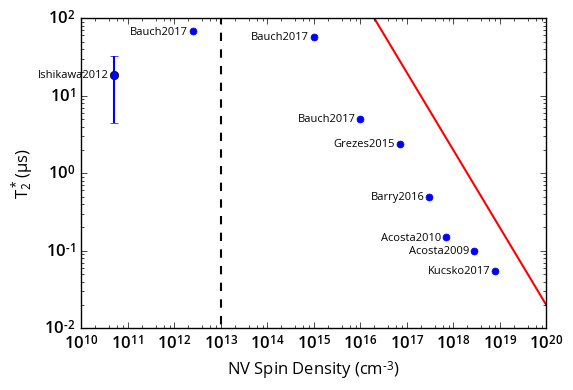

In [875]:
# pick non-nan values
ind = (~np.isnan(y1)) * (~np.isnan(x1)) 
# select only NV center values - first ten 
ind = ind[:10]

x1n = x1[ind]
y1n = y1[ind]
length = len(x1n)
labelsn = np.array(labels)[ind]

# plot data + labels
plt.plot(x1n, y1n, 'b.', ms=10)
for i in range(length):
    plt.text(x1n[i]*0.8, y1n[i]*(0.99), labelsn[i], fontsize=8, fontweight='normal', va='center', ha='right')

# plot p1-limit
xx = np.linspace(1e11, 1e20, 200);
plt.plot(xx, 1/(2 * np.pi * 0.014 * xx/(1.76*1e17)), 'r-', lw=1.5)

# set single spin resolvability limit

plt.plot([1e13,1e13], [1e-3,1e3],'k--', lw=1.5)

# plot iskawa 
plt.errorbar(5e10, 18.5, yerr=[14], fmt='o', color='b', lw=1.5)
# plt.text(5e10, 1.05, 18.5)
# set plot labels

plt.xlabel('NV Spin Density ($cm^{-3}$)')
plt.ylabel(r'$T_2^* (\mu$s)')

plt.xscale('log')
plt.yscale('log')

# plt.xlim(10**10, 10**19)
ax = plt.gca()
ax.set_xlim([1e10,1e20])
plt.ylim([10**-2, 100])

plt.savefig("fig1.pdf")

plt.show()

### Compare T2* and FOM2 versus Interrogated Spin

### FOM $\equiv T_2* \times$ NV spin density vs. NV spin density

C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 9
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 9
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 9


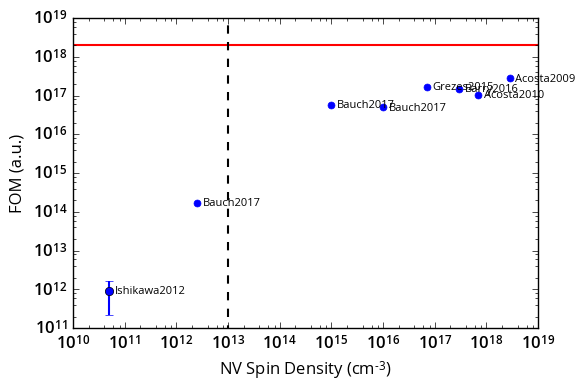

In [876]:
# pick non-nan values
ind = (~np.isnan(y2)) * (~np.isnan(x1)) 
# select only NV center values - first ten 
ind = ind[:9]

x1n = x1[ind]
y2n = y2[ind]

length = len(x1n)
labelsn = np.array(labels)[ind]

# plot data + labels
plt.plot(x1n, y2n, 'b.', ms=10)
for i in range(length):
    plt.text(x1n[i]*1.3, y2n[i]*(0.99), labelsn[i], fontsize=8, fontweight='normal', va='center', ha='left')

# plot p1-limit
xx = np.linspace(1e9, 1e22, 200);
plt.plot(xx, xx * 1/(2 * np.pi * 0.014 * xx/(1.76*1e17)), 'r-', lw=1.5)

# set single spin resolvability limit

plt.plot([1e13,1e13], [1e10, 1e19],'k--', lw=1.5)

# plot Ishikawa
plt.errorbar(5e10, 5.00e10 * 18.5, yerr=14 * 5.00e10, fmt='o', color='b', lw=1.5)
# plt.text(5e10, 1.05, 18.5)
# set plot labels

plt.xlabel('NV Spin Density ($cm^{-3}$)')
plt.ylabel(r'FOM (a.u.)')

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e10, 1e19)
plt.ylim([1e11, 1e19])

plt.savefig("fig2.pdf")

plt.show()

### Compare T2* and FOM2 versus Interrogated Spin

### T2* versus N density

C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 18 but corresponding boolean dimension is 9
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 18 but corresponding boolean dimension is 9
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 18 but corresponding boolean dimension is 9


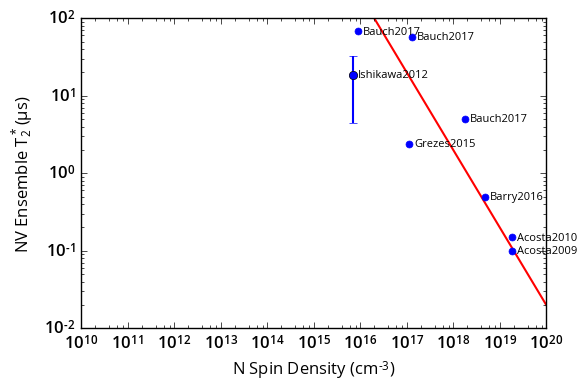

In [849]:
# pick non-nan values
ind = (~np.isnan(y1)) * (~np.isnan(x3)) 
# select only NV center values - first ten 
ind = ind[:9]

x3n = x3[ind]
y1n = y1[ind]
length = len(x3n)
labelsn = np.array(labels)[ind]

# plot p1-limit
xx = np.linspace(1e11, 1e22, 200);
plt.plot(xx, 1/(2 * np.pi * 0.014 * xx/(1.76*1e17)), 'r-', lw=1.5)

# plot data + labels
plt.plot(x3n, y1n, 'b.', ms=10)
for i in range(length):
    plt.text(x3n[i]*1.3, y1n[i]*(0.99), labelsn[i], fontsize=8, fontweight='normal', va='center', ha='left')

# set single spin resolvability limit

# plt.plot([1e13,1e13], [1e-3,1e3],'k--', lw=1.5)

# plot Ishikawa
plt.errorbar(7e15, 18.5, yerr=[14], fmt='o', color='b', lw=1.5)

# set plot labels

plt.xlabel('N Spin Density ($cm^{-3}$)')
plt.ylabel(r'NV Ensemble $T_2^* (\mu$s)')

plt.xscale('log')
plt.yscale('log')

# plt.xlim(10**15, 10**20)
ax = plt.gca()
ax.set_xlim([1e10,1e20])

plt.ylim([10**-2, 100])

plt.savefig("fig3.pdf")

plt.show()

### FOM $\equiv T_2* \times$ NV spin density vs. N spin density

C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 18 but corresponding boolean dimension is 9
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 18 but corresponding boolean dimension is 9
C:\Users\user\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 18 but corresponding boolean dimension is 9


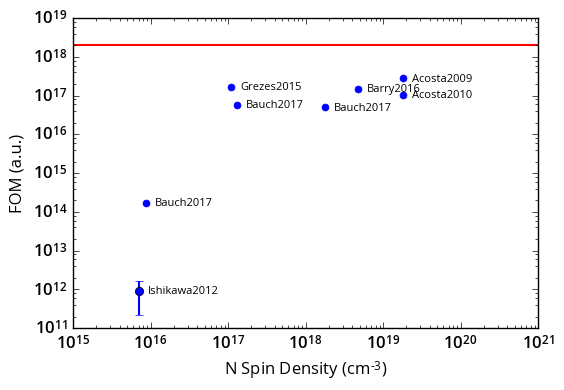

In [850]:
# pick non-nan values
ind = (~np.isnan(y2)) * (~np.isnan(x3)) 
# select only NV center values - first ten 
ind = ind[:9]

x3n = x3[ind]
y2n = y2[ind]

length = len(x3n)
labelsn = np.array(labels)[ind]

# plot data + labels
plt.plot(x3n, y2n, 'b.', ms=10)
for i in range(length):
    plt.text(x3n[i]*1.3, y2n[i]*(0.99), labelsn[i], fontsize=8, fontweight='normal', va='center', ha='left')

# plot p1-limit
xx = np.linspace(1e9, 1e22, 200);
plt.plot(xx, xx * 1/(2 * np.pi * 0.014 * xx/(1.76*1e17)), 'r-', lw=1.5)

# set single spin resolvability limit

plt.plot([1e13,1e13], [1e10, 1e19],'k--', lw=1.5)

# plot Ishikawa 
plt.errorbar(7e15, 5.00e10 * 18.5, yerr=14 * 5.00e10, fmt='o', color='b', lw=1.5)
# plt.text(5e10, 1.05, 18.5)
# set plot labels

plt.xlabel('N Spin Density ($cm^{-3}$)')
plt.ylabel(r'FOM (a.u.)')

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e15, 1e21)
plt.ylim([1e11, 1e19])

plt.savefig("fig4.pdf")

plt.show()

### Compare T2* and FOM2 versus Interrogated Spin

### T2* versus spin density (all spin species)

In [880]:
# define spin species as given in file
species_label = ['NV-', 'N', 'SiV0', 'P', 'PL5', 'PL6', 'PL?', 'Cr', 'Mn']
# species_label = species_label[:1]

# define legend labels
legend_label = ['NV$^-$:Diamond', 'N:Diamond', 'SiV$^0$:Diamond', 'P:Si', 'PL5:SiC', 'PL6:SiC', 'PL:SiC', 'Cr:SiC', 'Mn:ZnO']

# define markers and color
markers = ['bo', 'k*', 'r^', 'gs', '+m', 'Dc', 'py', 'rp', 'kr^']

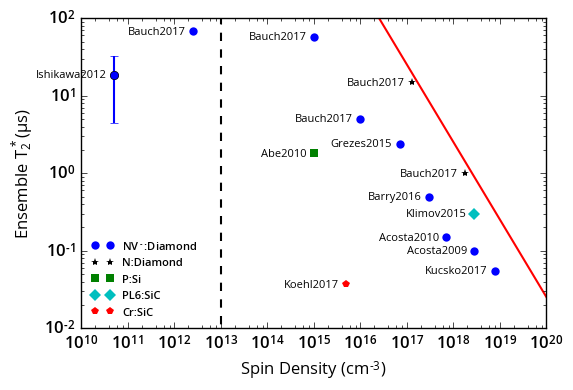

In [881]:
# interate over all spin types
s=0 # current run
for species in species_label: 
    species_df = df.loc[df['Defect']==species]
    
    # spin density in cm^-3
    x = pd.to_numeric(species_df.iloc[:,2], 'coerce').get_values()
    # T2*
    y = pd.to_numeric(species_df.iloc[:,5], 'coerce').get_values()
    
    # some of the entries are nan, remove these
    ind = (~np.isnan(y)) * (~np.isnan(x)) 
    x = x[ind];y = y[ind];
#     print(s, species)
#     print(len(x))
#     print(len(y))    
#     print('is not empty', (len(x)!=0) & (len(y)!=0))
    
    # only plot if x and y are not empty
    if (len(x)!=0) & (len(y)!=0):
        # reference label
        ref_label = species_df.iloc[ind,10].get_values()

        # plot data and labels
        plt.plot(x, y, markers[s], ms=6, markeredgecolor = 'none', label=legend_label[s])
        for i in range(len(x)):
            plt.text(x[i]*0.7, y[i]*(0.99), ref_label[i], fontsize=8, fontweight='normal', va='center', ha='right')  
    s=s+1  
# plot Ishikawa
plt.errorbar(5e10, 18.5, yerr=14, fmt='o', color='b', lw=1.5)

# dipolar-limit
xx = np.linspace(1e11, 1e22, 200);
plt.plot(xx, 1/(2 * np.pi * 0.011 * xx/(1.76*1e17)), 'r-', lw=1.5)

# set single spin resolvability limit
plt.plot([1e13,1e13], [1e-3,1e3],'k--', lw=1.5)

# set plot labels
plt.xlabel('Spin Density ($cm^{-3}$)')
plt.ylabel(r'Ensemble $T_2^* (\mu$s)')

# plot legend
plt.legend(frameon=False, loc=3, fontsize=8)

plt.xscale('log')
plt.yscale('log')

# plt.xlim(10**15, 10**20)
ax = plt.gca()
ax.set_xlim([1e10,1e20])

plt.ylim([10**-2, 100])

plt.savefig("fig7.pdf")

plt.show()

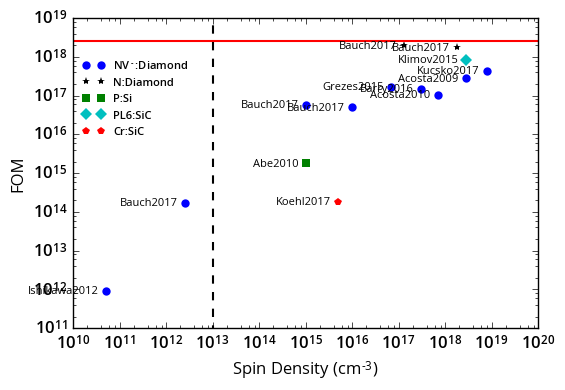

In [882]:
# interate over all spin types
s=0 # current run
for species in species_label: 
    species_df = df.loc[df['Defect']==species]
    
    # spin density in cm^-3
    x = pd.to_numeric(species_df.iloc[:,2], 'coerce').get_values()
    # T2*
    y = pd.to_numeric(species_df.iloc[:,7], 'coerce').get_values()
        
    # some of the entries are nan, remove these
    ind = (~np.isnan(y)) * (~np.isnan(x)) 
    x = x[ind];y = y[ind];
#     print(s, species)
#     print(len(x))
#     print(len(y))    
#     print('is not empty', (len(x)!=0) & (len(y)!=0))
    
    # only plot if x and y are not empty
    if (len(x)!=0) & (len(y)!=0):
        # reference label
        ref_label = species_df.iloc[ind,10].get_values()

        # plot data and labels
        plt.plot(x, y, markers[s], ms=6, markeredgecolor = 'none', label=legend_label[s])
        for i in range(len(x)):
            plt.text(x[i]*0.7, y[i]*(0.99), ref_label[i], fontsize=8, fontweight='normal', va='center', ha='right')  
    s=s+1  
# plot Ishikawa
plt.errorbar(5e10, 18.5, yerr=14, fmt='o', color='b', lw=1.5)

# dipolar-limit
xx = np.linspace(1e8, 1e22, 200);
plt.plot(xx, xx * 1/(2 * np.pi * 0.011 * xx/(1.76*1e17)), 'r-', lw=1.5)

# set single spin resolvability limit
plt.plot([1e13,1e13], [1e10, 1e19],'k--', lw=1.5)

# set plot labels
plt.xlabel('Spin Density ($cm^{-3}$)')
plt.ylabel(r'FOM')

# plot legend
plt.legend(frameon=False, loc=[0.01,0.6], fontsize=8)

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e10, 1e20)
plt.ylim([1e11, 1e19])

# # plt.xlim(10**15, 10**20)
# ax = plt.gca()
# ax.set_xlim([1e10,1e20])

# # plt.ylim([10**-2, 100])

plt.savefig("fig8.pdf")

plt.show()

# references + spin concentrations where available

In [412]:
um3 = 10**-12 # qubic micron in qubic cm

Abe, E., Tyryshkin, A. M., Tojo, S., Morton, J. J. L., Witzel, W. M., Fujimoto, A., … Itoh, K. M. (2010). Electron spin coherence of phosphorus donors in silicon: Effect of environmental nuclei. Physical Review B - Condensed Matter and Materials Physics, 82(12), 9–12. 

Acosta, V. M., Bauch, E., Jarmola, A., Zipp, L. J., Ledbetter, M. P., & Budker, D. (2010). Broadband magnetometry by infrared-absorption detection of nitrogen-vacancy ensembles in diamond. Applied Physics Letters, 97(17). http://doi.org/10.1063/1.3507884

In [245]:
detectionVol = 50 * 50 * 300 * um3
concentration = 7e17 # cm^-3
'%e' %  (detectionVol * concentration)

'5.250000e+11'

Acosta, V. M., Bauch, E., Ledbetter, M. P., Santori, C., Fu, K. M. C., Barclay, P. E., … Budker, D. (2009). Diamonds with a high density of nitrogen-vacancy centers for magnetometry applications. Physical Review B - Condensed Matter and Materials Physics, 80(11), 1–15. https://doi.org/10.1103/PhysRevB.80.115202

In [246]:
detectionVol = 0.5 * 0.5 * 300 * um3
concentration = 2.8e18 # cm^-3
'%e' %  (detectionVol * concentration)

'2.100000e+08'

Angerer, A., Perroy, R., & Careas, S. (2015). Subnanotesla quantum-interference magnetometry with a single spin in diamond. https://arxiv.org/abs/1509.01637

Christle, D., Falk, A., & Andrich, P. (2014). Isolated electron spins in silicon carbide with millisecond-coherence times. Nature Materials, 14(February), 160–163. https://doi.org/10.1038/NMAT4144

Becker, J. N., Görlitz, J., Arend, C., Markham, M., & Becher, C. (2016). Ultrafast, all-optical coherent control of single silicon vacancy colour centres in diamond, 2, 1–6. http://doi.org/10.1038/ncomms13512

George, R. E., Edwards, J. P., & Ardavan, A. (2013). Coherent spin control by electrical manipulation of the magnetic anisotropy. Physical Review Letters, 110(2), 1–5. https://doi.org/10.1103/PhysRevLett.110.027601

Grezes, C., Julsgaard, B., Kubo, Y., Ma, W. L., Stern, M., Bienfait, A., … Bertet, P. (2015). Storage and retrieval of microwave fields at the single-photon level in a spin ensemble. Physical Review A, 92(2), 20301. https://doi.org/10.1103/PhysRevA.92.020301

Maurer, P. C., Kucsko, G., Latta, C., Jiang, L., Yao, N. Y., Bennett, S. D., … Lukin, M. D. (2012). Room-Temperature Quantum Bit Memory Exceeding One Second. Science, 336(6086), 1283–1286. https://doi.org/10.1126/science.1220513

Kucsko, G., Choi, S., Choi, J., Maurer, P. C., Sumiya, H., Onoda, S., … Lukin, M. D. (2016). Critical thermalization of a disordered dipolar spin system in diamond.

In [855]:
detectionVol = 0.3 * 0.3 * 0.3 *um3
spindensity = 45e17
spins = '%e' %  (detectionVol * spindensity)
spins

'1.215000e+05'

Koehl, W. F., Diler, B., Whiteley, S. J., Bourassa, A., Son, N. T., Janzén, E., & Awschalom, D. D. (2017). Resonant optical spectroscopy and coherent control of Cr4+ spin ensembles in SiC and GaN. Physical Review B, 95(3), 35207. https://doi.org/10.1103/PhysRevB.95.035207

Klimov, P. V, Falk, A. L., Christle, D. J., Dobrovitski, V. V, & Awschalom, D. D. (2015). Quantum entanglement at ambient conditions in a macroscopic solid-state spin ensemble. Sci. Adv., 1(1), 1–8. http://doi.org/10.1126/sciadv.1501015

Koehl, W. F., Buckley, B. B., Heremans, F. J., Calusine, G., & Awschalom, D. D. (2011). Room temperature coherent control of defect spin qubits in silicon carbide. Nature, 479(7371), 84–87. http://doi.org/10.1038/nature10562

Kubo, Y., Grezes, C., Dewes, A., Umeda, T., Isoya, J., Sumiya, H., … Bertet, P. (2011). Hybrid quantum circuit with a superconducting qubit coupled to a spin ensemble. Physical Review Letters, 107(22). http://doi.org/10.1103/PhysRevLett.107.220501

In [247]:
detectionVol = 40 * um3
spins = 10**3
concentraton = '%e' %  (spins * detectionVol)
concentration

2.8e+18

Zhou, Y., Wang, J., Zhang, X., Li, K., Cai, J., & Gao, W. (2017). Self-protected nanoscale thermometry based on spin defects in silicon carbide, (4), 1–7. Retrieved from http://arxiv.org/abs/1704.03301